**Fully cleaning the dataset**

**Importing data**


In [1]:
# # imports
# from IPython.display import clear_output
# from PIL import Image
# import os
# import json
# # clear
# clear_output(wait=True)
# # installing kaggle
# !pip install -q kaggle
# # user and key info
# info = {"username":"jackbellamy","key":"3442898ba5e904ac3a48eb5b59398805"}
# # opening file
# json_object = json.dumps(info, indent=4)
# with open("kaggle.json", "w") as outfile:
#     outfile.write(json_object)
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# # copying data to content file of kaggle which can be found on the left hand side of the screen
# if not (os.path.exists("/content/nfl-big-data-bowl-2022")):
#   !kaggle competitions download -c nfl-big-data-bowl-2022
#   !mkdir nfl-big-data-bowl-2022
#   !unzip nfl-big-data-bowl-2022.zip -d nfl-big-data-bowl-2022

**Serialisation**

In [39]:
import pandas as pd
# reading the data to variables
scouting = pd.read_csv("nfl-big-data-bowl-2022/PFFScoutingData.csv")
games = pd.read_csv("nfl-big-data-bowl-2022/games.csv")
players = pd.read_csv("nfl-big-data-bowl-2022/players.csv")
plays = pd.read_csv("nfl-big-data-bowl-2022/plays.csv")
tracking2018 = pd.read_csv("nfl-big-data-bowl-2022/tracking2018.csv")
tracking2019 = pd.read_csv("nfl-big-data-bowl-2022/tracking2019.csv")
tracking2020 = pd.read_csv("nfl-big-data-bowl-2022/tracking2020.csv")

**Generalised cleaning functions**

**Abbreviations to full names**

In [3]:
def abbrvs(csv,column,abbrv,fullname):
  # new names
  type_name = []
  # looping through
  for i in csv[column]:
    # filtering out NaN values
    if i in abbrv:
      index = abbrv.index(i)
      type_name.append(fullname[index])
    else:
      type_name.append(i)
  return type_name

**Team and number splitting**

In [4]:
def team_number_splitting(csv,column,symbol):
  # splitting to team and number
  split_team = []
  split_numbers = []
  # splitting the data
  split = csv[column].str.split(symbol, expand = True)
  # loop for each
  for i in range(0,len(csv)):
    # specific data
    split.iloc[i]
    # number of NaN
    nan_num = split.iloc[i].isna().sum()
    max = len(split.iloc[i])
    if max-nan_num == 0:
      split_team.append(csv[column][i])
      split_numbers.append(csv[column][i])
    else:
      info = []
      for j in range(0,(max-nan_num)):
        split_i = split[j][i].split(" ")
        info.append(split_i)
      # team name
      split_team.append(info[0][0])
      # numbers
      nums = []
      for k in range(0,max-nan_num):
        num = info[k][1]
        nums.append(num)
      split_numbers.append(nums)
  return split_team,split_numbers

**Number splitting**

In [5]:
def number_splitting(csv,column,symbol,n):
  split = csv[column].str.split(symbol, n = n, expand = True)
  return split

**Pandas to number**

In [6]:

def pd_to_num(csv,split,column_names):
  split.columns = column_names
  # adding columns
  for name in column_names:
    csv[name] = pd.to_numeric(split[name])
  return

**Scouting** 


In [7]:
# before
scouting.head()

,gameId,playId,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,37,NaN,NaN,NaN,3.85,D,R,R,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,PHI 23; PHI 27,NaN,NaN
1,2018090600,366,OK,0.84,2.12,4.46,N,C,C,C,R,PHI 57,NaN,PHI 54,NaN,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21,CC
2,2018090600,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHI 58,NaN,NaN
3,2018090600,677,NaN,NaN,NaN,4.06,D,R,R,C,C,ATL 83,ATL 22,ATL 27,8-0-2,NaN,NaN,ATL 17; ATL 22,NaN,NaN
4,2018090600,872,OK,0.84,2.00,4.35,N,C,L,NaN,NaN,NaN,NaN,NaN,NaN,PHI 18; PHI 29,ATL 85,ATL 37,ATL 83; ATL 34; ATL 21,BF


In [8]:
# abbreviations: 'kickType', 'kickDirectionIntended', 'kickDirectionActual', 'returnDirectIntended', 'returnDirectionActual', 'KickTypeContact'
# team number splitting: 'missedTackler', 'specialTeamsSafeties', 'Vises'
# number splitting: 'kickoffReturnFormation'

In [9]:
# abbreviations
# 'kickType'
csv = scouting
column = "kickType"
kick_types = ['D','F','K','O','P','Q','S','B','N','R','A']
kick_type_names = ['Deep','Flat','Free','Obvious','Pooch','Squib','Surprise','Deep','Normal','Rugby','Aussie']
# calling function
kick_type_fullnames = abbrvs(csv,column,kick_types,kick_type_names)
# adding column
scouting["kick_type_name"] = kick_type_fullnames

# 'kickDirectionIntended', 'kickDirectionActual', 'returnDirectIntended', 'returnDirectionActual', 'KickTypeContact'

In [10]:
# team and numbers
# 'missedTackler'
csv = scouting

column = "missedTackler"
symbol = "; "
# calling function
missed_tackler_team, missed_tackler_numbers = team_number_splitting(csv,column,symbol)
# adding
scouting["missed_tackler_team"] = missed_tackler_team
scouting["missed_tackler_numbers"] = missed_tackler_numbers

# 'specialTeamsSafeties'
column = "specialTeamsSafeties"
symbol = "; "
# calling function
specialTeamsSafeties_team, specialTeamsSafeties_numbers = team_number_splitting(csv,column,symbol)
# adding
scouting["special_teams_safeties_team"] = specialTeamsSafeties_team
scouting["special_teams_safeties_numbers"] = specialTeamsSafeties_numbers

# 'Vises'
column = "vises"
symbol = "; "
# calling function
vises_team, vises_numbers = team_number_splitting(csv,column,symbol)
# adding
scouting["vises_team"] = vises_team
scouting["vises_numbers"] = vises_numbers

In [11]:
# number splitting
# 'kickoffReturnFormation'
csv = scouting
column = "kickoffReturnFormation"
symbol = "-"
n = 2
column_names = ['formation_front','formation_mid','formation_back']
# calling function
formation_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,formation_split,column_names)

In [12]:
# after
scouting.head()

,gameId,playId,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,...,kick_type_name,missed_tackler_team,missed_tackler_numbers,special_teams_safeties_team,special_teams_safeties_numbers,vises_team,vises_numbers,formation_front,formation_mid,formation_back
0,2018090600,37,NaN,NaN,NaN,3.85,D,R,R,NaN,...,Deep,NaN,NaN,PHI,"[23, 27]",NaN,NaN,8.0,0.0,2.0
1,2018090600,366,OK,0.84,2.12,4.46,N,C,C,C,...,Normal,PHI,[57],NaN,NaN,ATL,"[83, 27, 34, 21]",NaN,NaN,NaN
2,2018090600,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,PHI,[58],NaN,NaN,NaN,NaN,NaN
3,2018090600,677,NaN,NaN,NaN,4.06,D,R,R,C,...,Deep,ATL,[83],ATL,"[17, 22]",NaN,NaN,8.0,0.0,2.0
4,2018090600,872,OK,0.84,2.00,4.35,N,C,L,NaN,...,Normal,NaN,NaN,ATL,[37],ATL,"[83, 34, 21]",NaN,NaN,NaN


**Games**

In [13]:
# before
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN


In [14]:
# abbreviations: 'homeTeamAbbr' , 'visitorTeamAbbr'
# team number splitting:
# number splitting: 'gameDate', 'gameTimeEastern'

In [15]:
# abbreviations
# 'homeTeamAbbr', 'visitorTeamAbbr'

In [16]:
# number splitting
# 'gameDate'
csv = games

column = "gameDate"
symbol = "/"
n = 2
column_names = ['game_date_day','game_date_month','game_date_year']
# calling function
game_date_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,game_date_split,column_names)

# 'gameTimeEastern'
column = "gameTimeEastern"
symbol = ":"
n = 2
column_names = ['game_time_hour','game_time_minute','game_time_second']
# calling function
game_time_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,game_time_split,column_names)

In [17]:
# after
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,game_date_day,game_date_month,game_date_year,game_time_hour,game_time_minute,game_time_second
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL,9,6,2018,20,20,0
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF,9,9,2018,13,0,0
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT,9,9,2018,13,0,0
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN,9,9,2018,13,0,0
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN,9,9,2018,13,0,0


**Players**

In [18]:
# before
players.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen


In [19]:
# abbreviations:
# team number splitting:
# number splitting: birth
# unique one is height

In [20]:
# 'birthDate'
# splitting the numbers
players['birth_year'] = pd.DatetimeIndex(players['birthDate']).year

In [21]:
# 'height'
height_split = players["height"].str.split("-", n = 1, expand = True)
# new column names
height_split.columns = ['Feet', 'Inch']
# adding new columns
players["height_feet"] = pd.to_numeric(height_split["Feet"])
players["height_inch"] = pd.to_numeric(height_split["Inch"])
# still have 73 feet
# getting rid of NaN values
players["height_inch"] = players["height_inch"].fillna(0)
# replacing heights that did not have '-' at start
for i in players["height_feet"]:
    if i > 7:
        j = 0.0833333 * i
        players["height_feet"].replace({i : j}, inplace=True)        
# inches to numerical value
players["height_inch"] = 0.0833333 * players["height_inch"]
# adding feet and inches to get one value
height_numerical = players["height_feet"] + players["height_inch"]
# adding new numerical value column
players["height_numerical"] = pd.to_numeric(height_numerical)

In [22]:
# after
players.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName,birth_year,height_feet,height_inch,height_numerical
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,1992.0,6.0,0.083333,6.083333
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,1994.0,6.0,0.000000,6.000000
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,1993.0,6.0,0.000000,6.000000
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,1992.0,6.0,0.083333,6.083333
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,1993.0,6.0,0.083333,6.083333


**Plays**

In [23]:
# before
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45


In [24]:
# abbreviations: 'possessionTeam'
# team number splitting: 'penaltyJerseyNumbers'
# number splitting: 'gameClock'

In [25]:
# abbreviations
# 'possessionTeam'

In [26]:
# # team number splitting
# # 'penaltyJerseyNumbers'
# csv = plays

# column = "penaltyJerseyNumbers"
# symbol = ";"
# # calling function
# penaltyJerseyNumbers_team, penaltyJerseyNumbers_numbers = team_number_splitting(csv,column,symbol)
# # adding
# scouting["penalty_jersey_team"] = penaltyJerseyNumbers_team
# scouting["penalty_jersey_numbers"] = penaltyJerseyNumbers_numbers

# broken, think it is to do with values being just team name 'BAL'

IndexError: list index out of range

In [27]:
# number splitting
# 'gameClock'
csv = plays

column = "gameClock"
symbol = ":"
n = 2
column_names = ['game_clock_minute','game_clock_second','game_clock_milli']
# calling function
game_time_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,game_time_split,column_names)

In [28]:
# after
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,game_clock_minute,game_clock_second,game_clock_milli
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,0,0,NaN,66.0,NaN,40,45,15,0,0
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,0,0,NaN,56.0,5.0,36,18,9,20,0
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,0,0,NaN,21.0,NaN,0,13,5,3,0
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,0,3,NaN,64.0,30.0,34,75,5,1,0
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,0,3,NaN,65.0,NaN,45,45,0,33,0


**Tracking**

In [29]:
# before
tracking2018.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right


In [30]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [35]:
# it is clean

merged_data = pd.merge(tracking2018, plays, on=['gameId', 'playId'])


features = ['s', 'a', 'o']


filtered_data = merged_data[merged_data['specialTeamsPlayType'].isin(['Extra Point', 'Field Goal', 'Kickoff', 'Punt'])]

filtered_data = filtered_data.dropna(subset=features)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data[features])

kmeans = KMeans(n_clusters=4) # 4 clusters for the 4 different play types
clusters = kmeans.fit_predict(scaled_data)

filtered_data['cluster'] = clusters



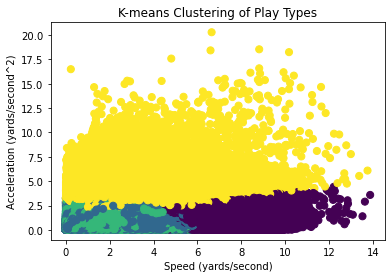

In [36]:
plt.scatter(filtered_data['s'], filtered_data['a'], c=filtered_data['cluster'], cmap='viridis', s=50)
plt.xlabel('Speed (yards/second)')
plt.ylabel('Acceleration (yards/second^2)')
plt.title('K-means Clustering of Play Types')
plt.show()


In [40]:
all_plays = plays.merge(games, left_on="gameId", right_on="gameId")
# merge scouting data
all_plays = all_plays.merge(scouting, left_on=["gameId", "playId"], right_on=["gameId", "playId"])

# Add in tracking for 18, 19, 20 and filter to the first frame only
iter_csv = pd.read_csv("nfl-big-data-bowl-2022/tracking2018.csv", iterator=True, chunksize=1e6)
tracking18 = pd.concat([chunk[chunk["frameId"] == 1] for chunk in iter_csv])

iter_csv = pd.read_csv("nfl-big-data-bowl-2022/tracking2019.csv", iterator=True, chunksize=1e6)
tracking19 = pd.concat([chunk[chunk["frameId"] == 1] for chunk in iter_csv])

iter_csv = pd.read_csv("nfl-big-data-bowl-2022/tracking2020.csv", iterator=True, chunksize=1e6)
tracking20 = pd.concat([chunk[chunk["frameId"] == 1] for chunk in iter_csv])

In [41]:
formation_tracking = pd.concat([tracking18, tracking19, tracking20])
del tracking18, tracking19, tracking20

df = formation_tracking.merge(all_plays, on=["gameId", "playId"])
del all_plays

normalize data

In [42]:
df.loc[df["y"] < 0, "y"] = 0
df.loc[df["y"] > 53, "y"] = 53

df["x_norm"] = df["x"]
df["y_norm"] = df["y"]
df["absoluteYardlineNumber_norm"] = df["absoluteYardlineNumber"]

df.loc[df["playDirection"] == "left", "x_norm"] = (
    120 - df.loc[df["playDirection"] == "left", "x"]
)
df.loc[df["playDirection"] == "left", "y_norm"] = (
    53 - df.loc[df["playDirection"] == "left", "y"]
)
df.loc[df["playDirection"] == "left", "absoluteYardlineNumber_norm"] = (
    120 - df.loc[df["playDirection"] == "left", "absoluteYardlineNumber"]
)

In [43]:
def has_possession(row):
    if (row["team"] == "away") and (
        row["possessionTeam"] == row["visitorTeamAbbr"]
    ):
        return True
    elif (row["team"] == "home") and (
        row["possessionTeam"] == row["homeTeamAbbr"]
    ):
        return True
    else:
        return False

In [44]:
df["has_possession"] = df.apply(has_possession, axis=1)

In [45]:
# should be dist from line of scrimmage
df["x_from_scrimmage"] = df["absoluteYardlineNumber_norm"] - df["x_norm"]


In [46]:
def calculate_y_from_ball(rows):
    y_football = rows.loc[rows["team"] == "football", "y_norm"].item()
    return rows["y_norm"] - y_football


In [47]:
df["y_from_ball"] = df.groupby(["gameId", "playId"]).apply(calculate_y_from_ball).droplevel(level=[0,1])



In [48]:
# offensive players should all be greater than 0 at the start of the play
# some aren't, let's set the ones greater than a yard off to 0
df.loc[
    (df["x_from_scrimmage"] < -1) & (df["has_possession"]), "x_from_scrimmage"
] = 0

# defensive players should all be less than 0 at the start of the play
# some aren't, let's set the ones greater than a yard off to 0
df.loc[
    (df["x_from_scrimmage"] > 1) & (~df["has_possession"]), "x_from_scrimmage"
] = 0

df["x_from_scrimmage_abs"] = df["x_from_scrimmage"].abs()

In [49]:
# defense
defense_df = df.loc[~df["has_possession"]].copy()

# offense
offense_df = df.loc[df["has_possession"]].copy()

def_min_x = defense_df["x_from_scrimmage_abs"].min()
def_max_x = defense_df["x_from_scrimmage_abs"].max()

off_min_x = offense_df["x_from_scrimmage_abs"].min()
off_max_x = offense_df["x_from_scrimmage_abs"].max()

print(def_min_x, def_max_x)
print(off_min_x, off_max_x)


x_dim = 100 // 2 
y_dim = 53 // 2

defense_x_range = np.linspace(def_min_x, def_max_x, int(x_dim))
offense_x_range = np.linspace(off_min_x, off_max_x, int(x_dim))

y_range = np.linspace(df["y_from_ball"].min(), df["y_from_ball"].max(), y_dim)

0.0 78.15
0.0 16.86


In [50]:
print(def_min_x, def_max_x)

0.0 78.15


In [51]:
def get_closest(array, values):
    # make sure array is a numpy array
    array = np.array(array)

    # get insert positions
    idxs = np.searchsorted(array, values, side="left")

    # find indexes where previous index is closer
    prev_idx_is_less = (idxs == len(array)) | (
        np.fabs(values - array[np.maximum(idxs - 1, 0)])
        < np.fabs(values - array[np.minimum(idxs, len(array) - 1)])
    )
    idxs[prev_idx_is_less] -= 1

    # this returns the closest value from linspace
    #return array[idxs]

    # this returns the index of the closest value from linspace, which is really all we need, I think
    return idxs

In [52]:
defense_df["x_transformed"] = get_closest(
    defense_x_range, defense_df["x_from_scrimmage_abs"]
)
defense_df["y_transformed"] = get_closest(y_range, defense_df["y_norm"])

offense_df["x_transformed"] = get_closest(
    offense_x_range, offense_df["x_from_scrimmage_abs"]
)
offense_df["y_transformed"] = get_closest(y_range, offense_df["y_norm"])

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter by pass result
complete_pass = df[df["passResult"] == "C"]
incomplete_pass = df[df["passResult"] == "I"]

# Separate defensive and offensive players for each pass result
defense_complete = complete_pass[~complete_pass["has_possession"]]
offense_complete = complete_pass[complete_pass["has_possession"]]

defense_incomplete = incomplete_pass[~incomplete_pass["has_possession"]]
offense_incomplete = incomplete_pass[incomplete_pass["has_possession"]]

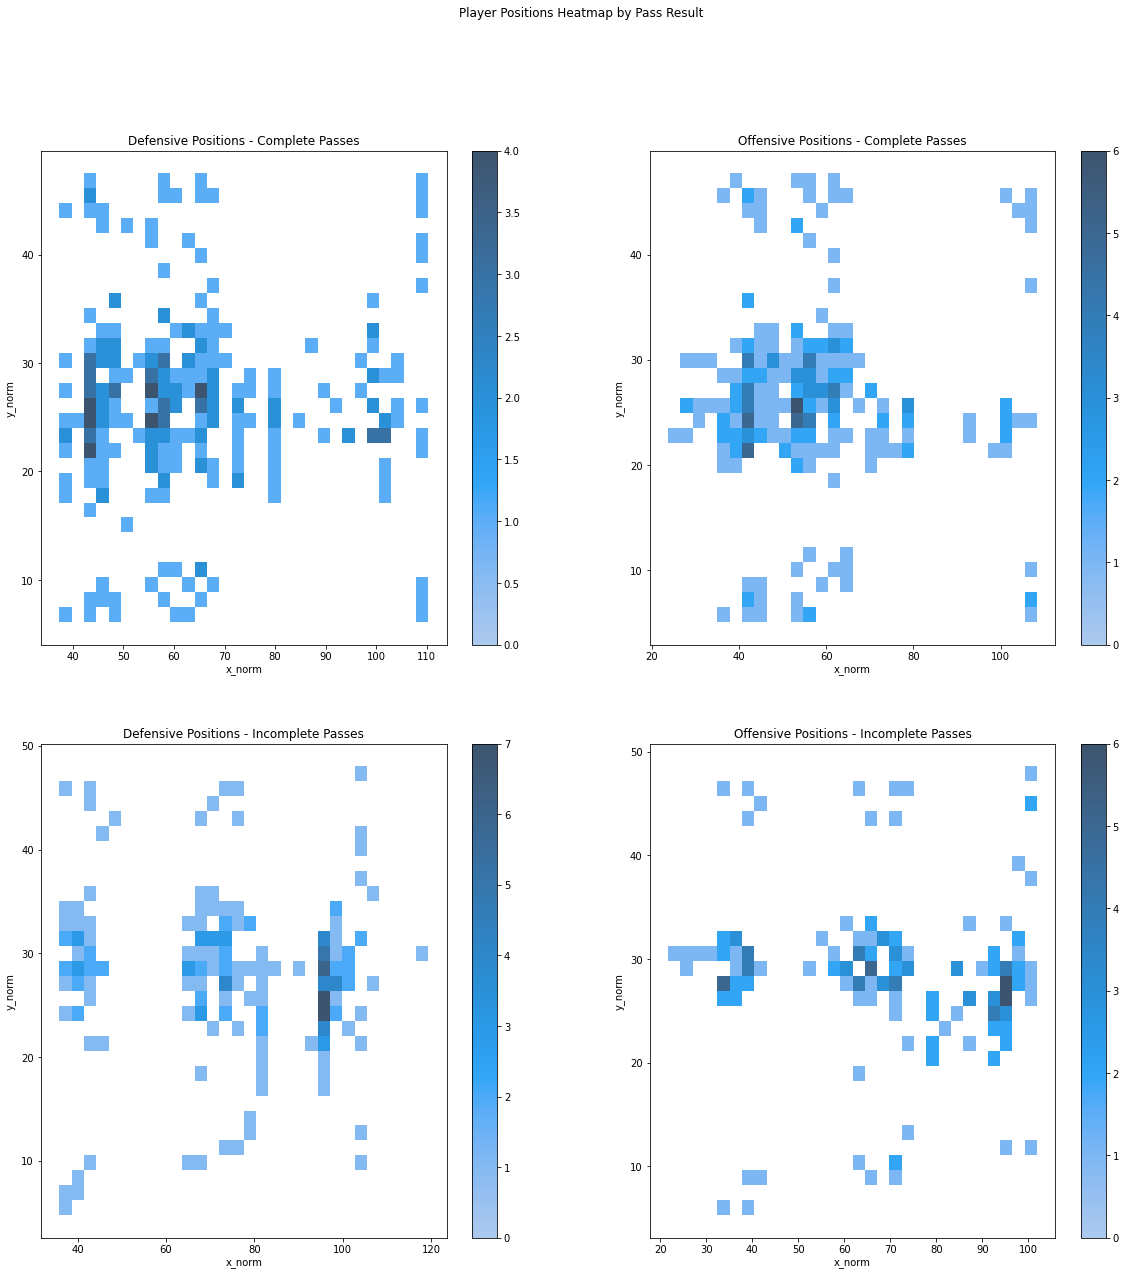

In [54]:
# Create heatmaps
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle("Player Positions Heatmap by Pass Result")

# Defensive heatmap for complete passes
sns.histplot(
    defense_complete, x="x_norm", y="y_norm", bins=30, cbar=True, ax=axes[0, 0]
)
axes[0, 0].set_title("Defensive Positions - Complete Passes")

# Offensive heatmap for complete passes
sns.histplot(
    offense_complete, x="x_norm", y="y_norm", bins=30, cbar=True, ax=axes[0, 1]
)
axes[0, 1].set_title("Offensive Positions - Complete Passes")

# Defensive heatmap for incomplete passes
sns.histplot(
    defense_incomplete, x="x_norm", y="y_norm", bins=30, cbar=True, ax=axes[1, 0]
)
axes[1, 0].set_title("Defensive Positions - Incomplete Passes")

# Offensive heatmap for incomplete passes
sns.histplot(
    offense_incomplete, x="x_norm", y="y_norm", bins=30, cbar=True, ax=axes[1, 1]
)
axes[1, 1].set_title("Offensive Positions - Incomplete Passes")

plt.show()

below is for offensive players

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter by pass result
complete_pass = df[df["passResult"] == "C"]
incomplete_pass = df[df["passResult"] == "I"]
sack = df[df["passResult"] == "S"]
interception = df[df["passResult"] == "IN"]

# Separate offensive players for each pass result
offense_complete = complete_pass[complete_pass["has_possession"]]
offense_incomplete = incomplete_pass[incomplete_pass["has_possession"]]
offense_sack = sack[sack["has_possession"]]
offense_interception = interception[interception["has_possession"]]

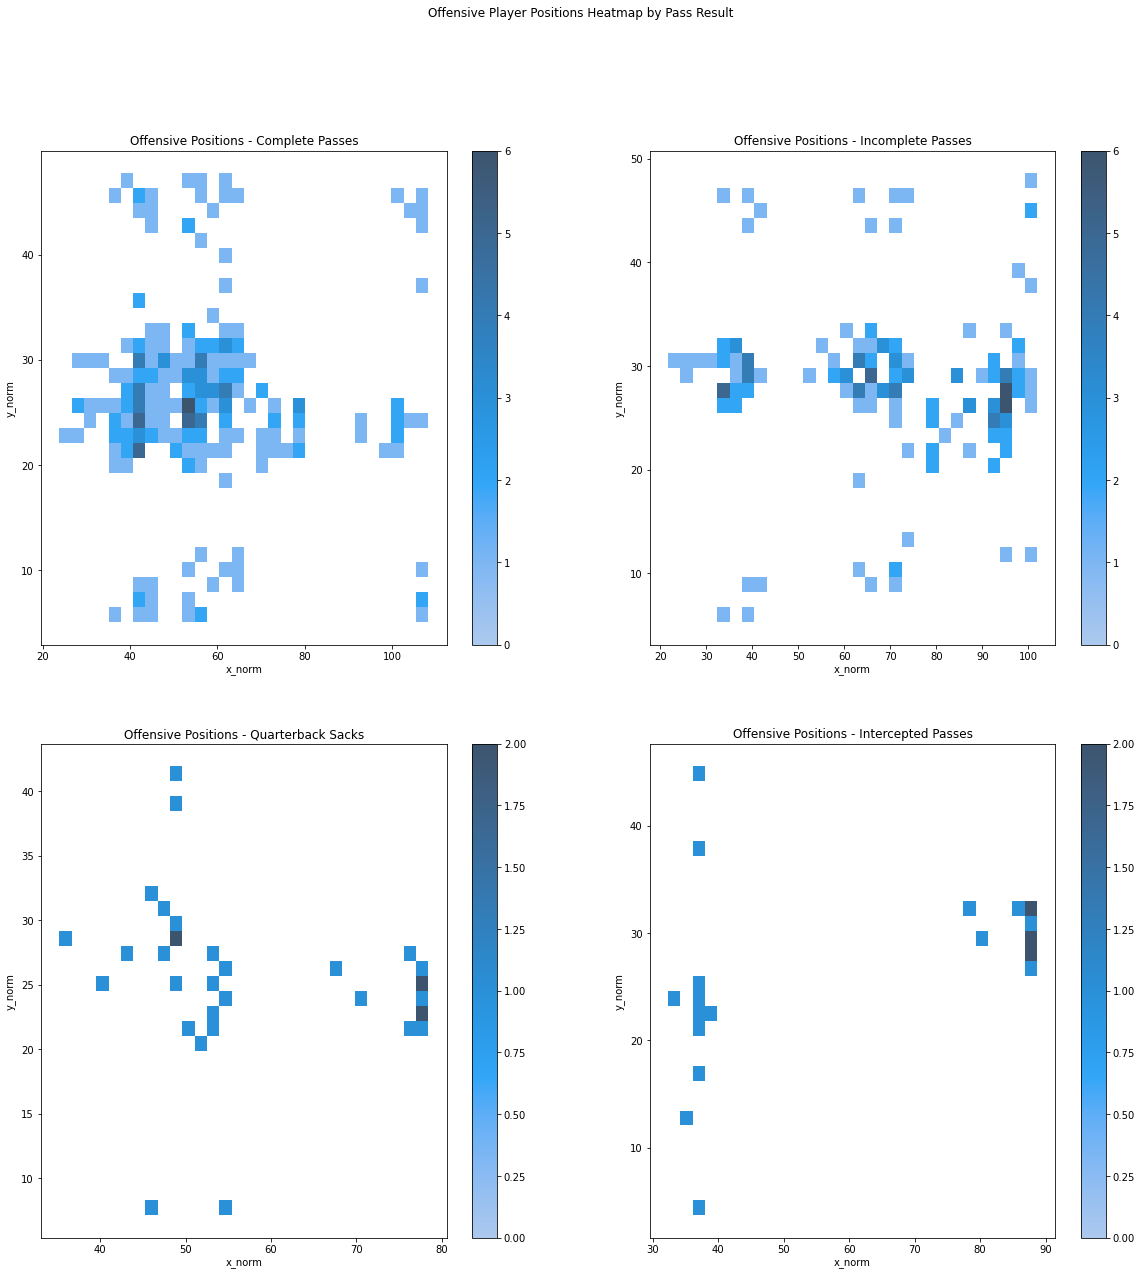

In [56]:
# Create heatmaps
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle("Offensive Player Positions Heatmap by Pass Result")

# Offensive heatmap for complete passes
sns.histplot(
    offense_complete, x="x_norm", y="y_norm", bins=30, cbar=True, ax=axes[0, 0]
)
axes[0, 0].set_title("Offensive Positions - Complete Passes")

# Offensive heatmap for incomplete passes
sns.histplot(
    offense_incomplete, x="x_norm", y="y_norm", bins=30, cbar=True, ax=axes[0, 1]
)
axes[0, 1].set_title("Offensive Positions - Incomplete Passes")

# Offensive heatmap for quarterback sacks
sns.histplot(offense_sack, x="x_norm", y="y_norm", bins=30, cbar=True, ax=axes[1, 0])
axes[1, 0].set_title("Offensive Positions - Quarterback Sacks")

# Offensive heatmap for intercepted passes
sns.histplot(
    offense_interception, x="x_norm", y="y_norm", bins=30, cbar=True, ax=axes[1, 1]
)
axes[1, 1].set_title("Offensive Positions - Intercepted Passes")

plt.show()

below is for defensive players, might be useless


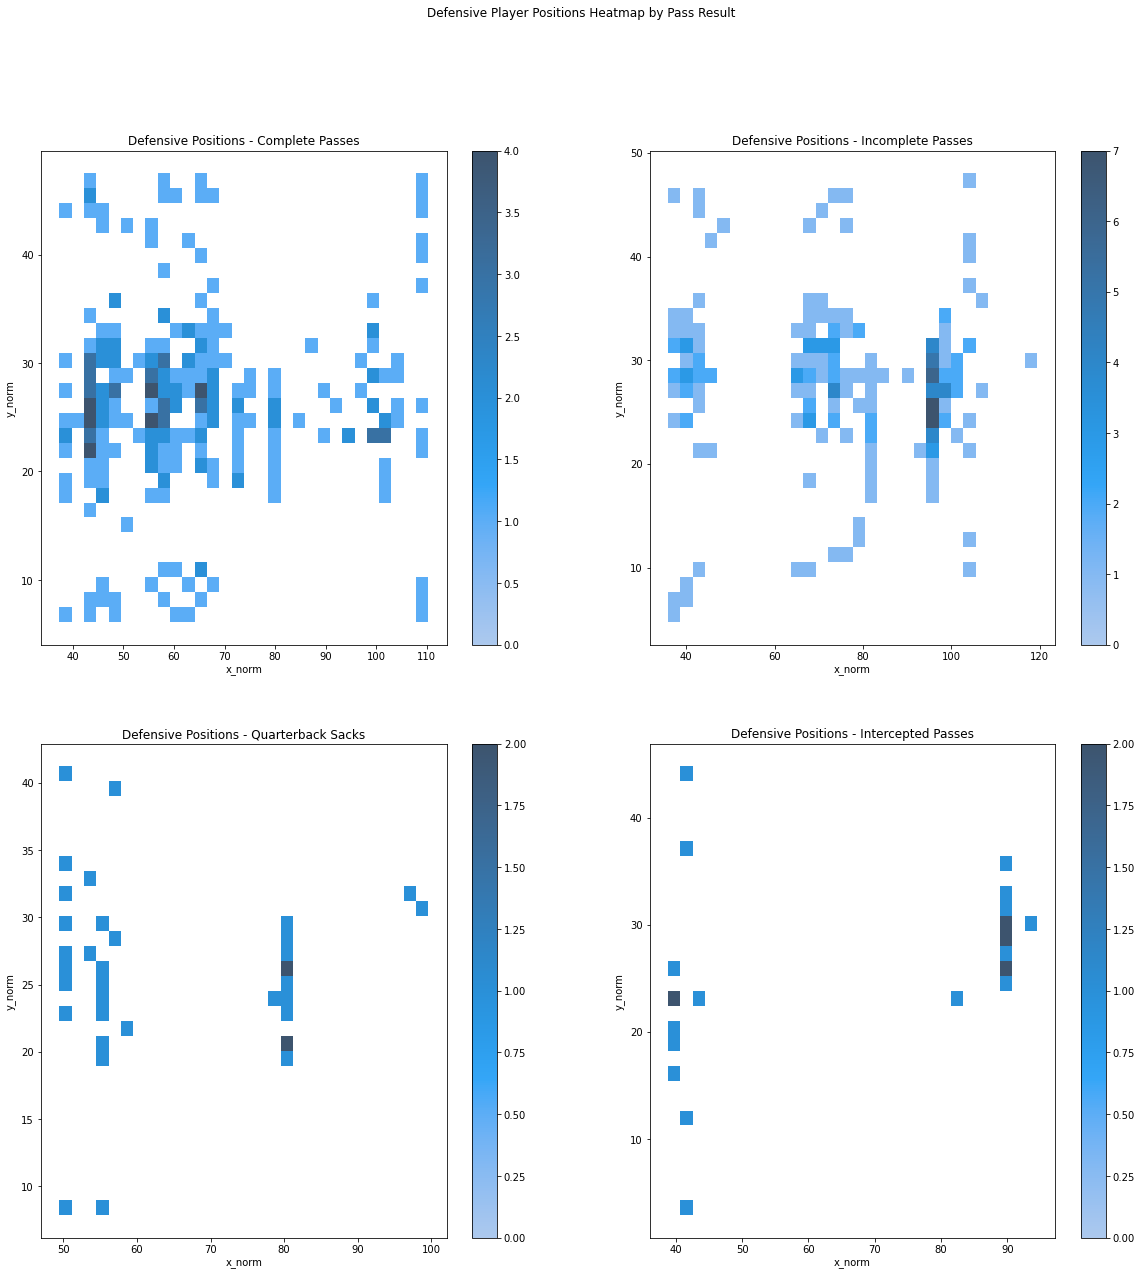

In [57]:
# Separate defensive players for each pass result
defense_complete = complete_pass[~complete_pass["has_possession"]]
defense_incomplete = incomplete_pass[~incomplete_pass["has_possession"]]
defense_sack = sack[~sack["has_possession"]]
defense_interception = interception[~interception["has_possession"]]

# Create heatmaps
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle("Defensive Player Positions Heatmap by Pass Result")

# Defensive heatmap for complete passes
sns.histplot(
    defense_complete, x="x_norm", y="y_norm", bins=30, cbar=True, ax=axes[0, 0]
)
axes[0, 0].set_title("Defensive Positions - Complete Passes")

# Defensive heatmap for incomplete passes
sns.histplot(
    defense_incomplete, x="x_norm", y="y_norm", bins=30, cbar=True, ax=axes[0, 1]
)
axes[0, 1].set_title("Defensive Positions - Incomplete Passes")

# Defensive heatmap for quarterback sacks
sns.histplot(defense_sack, x="x_norm", y="y_norm", bins=30, cbar=True, ax=axes[1, 0])
axes[1, 0].set_title("Defensive Positions - Quarterback Sacks")

# Defensive heatmap for intercepted passes
sns.histplot(
    defense_interception, x="x_norm", y="y_norm", bins=30, cbar=True, ax=axes[1, 1]
)
axes[1, 1].set_title("Defensive Positions - Intercepted Passes")

plt.show()


**Overall, clean now except 'penaltyJerseyNumbers' and some abbrvs**